In [8]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
data = pd.read_csv("data/Mall_Customers.csv")

# 1. Display Top 5 Rows in the dataset

In [9]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# 2. Check last 5 Rows in dataset

In [10]:
data.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


# 3. Find shape of the dataseet (NO OF ROWS AND COLUMNS)

In [11]:
data.shape

(200, 5)

In [12]:
print("No of rows:",data.shape[0])

No of rows: 200


In [13]:
print("No of Columns:",data.shape[1])

No of Columns: 5


# 4. Get Information about our dataset like no of rows, columns, datatypes of each columns etc

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


# 5. Check Null Values in the dataset 

In [16]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# 6. Check Overall Statistics About Our dataset

In [17]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# 7. Kmeans Clustering

In [18]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [19]:
X = data[['Annual Income (k$)','Spending Score (1-100)']]

In [20]:
from sklearn.cluster import KMeans

In [21]:
KM = KMeans()

In [22]:
KM.fit(X)

KMeans()

In [23]:
KM.fit_predict(X) #fits and creates dependent variable

array([5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3,
       5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 0, 3, 0, 0,
       5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 6, 6, 0, 0, 0, 0,
       0, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 6, 7, 6, 7, 2, 7, 2, 7,
       6, 7, 2, 7, 2, 7, 2, 7, 2, 7, 6, 7, 2, 7, 6, 7, 2, 7, 2, 7, 2, 7,
       2, 7, 2, 7, 2, 7, 6, 7, 2, 7, 2, 7, 2, 7, 2, 7, 2, 7, 2, 7, 2, 7,
       2, 7, 2, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1])

# 8. Using Elbow method to find the Optimal Number of Clusters

In [24]:
wcss = [] #within cluster sum of squares
for i in range(1,11):
    KM = KMeans(n_clusters=i)
    KM.fit(X)
    wcss.append(KM.inertia_)

In [25]:
wcss

[269981.28,
 181363.59595959596,
 106348.37306211119,
 73679.78903948834,
 44448.45544793371,
 37239.835542456036,
 31280.903845940935,
 24990.4343103969,
 21797.084944646376,
 19755.619860833405]

In [26]:
import matplotlib.pyplot as plt

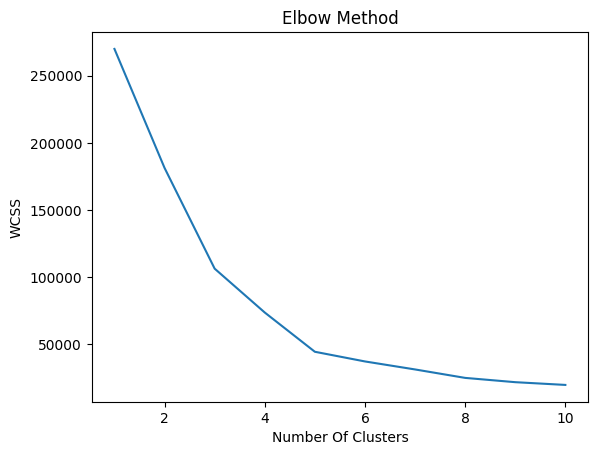

In [27]:
plt.plot(range(1,11),wcss)
plt.title("Elbow Method")
plt.xlabel("Number Of Clusters")
plt.ylabel("WCSS")
plt.show()

# 9. Model Training

In [28]:
X = data[['Annual Income (k$)','Spending Score (1-100)']]

In [29]:
KM = KMeans(n_clusters=5,random_state=42)
ym = KM.fit_predict(X)

In [30]:
ym

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

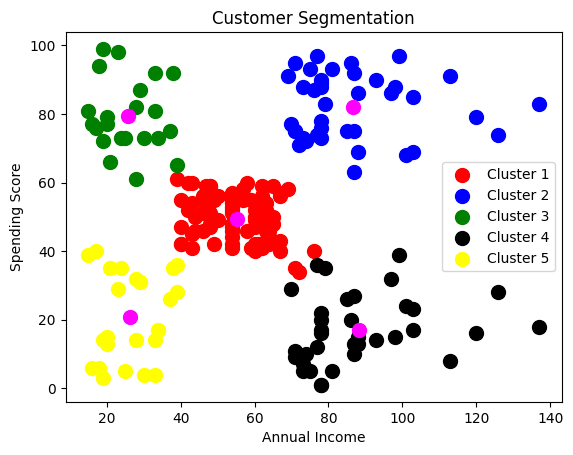

In [31]:
plt.scatter(X.iloc[ym==0,0],X.iloc[ym==0,1],s=100,c='red',label="Cluster 1")
plt.scatter(X.iloc[ym==1,0],X.iloc[ym==1,1],s=100,c='blue',label="Cluster 2")
plt.scatter(X.iloc[ym==2,0],X.iloc[ym==2,1],s=100,c='green',label="Cluster 3")
plt.scatter(X.iloc[ym==3,0],X.iloc[ym==3,1],s=100,c='black',label="Cluster 4")
plt.scatter(X.iloc[ym==4,0],X.iloc[ym==4,1],s=100,c='yellow',label="Cluster 5")
plt.scatter(KM.cluster_centers_[:,0],KM.cluster_centers_[:,1],s=100,color="magenta") #centorids
plt.title("Customer Segmentation")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.legend()
plt.show()

In [32]:
KM.predict([[15,39]]) #annual income and spending score

array([4])

# Save the Model

In [33]:
import joblib

In [34]:
joblib.dump(KM,"Customer_Segmentation_saved_model")

['Customer_Segmentation_saved_model']

In [35]:
model = joblib.load("Customer_Segmentation_saved_model")

In [36]:
model.predict([[15,39]])

array([4])